## Importing libraries

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

## Loading dataset

In [3]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [4]:
boston_features = {
    'Average Number of Rooms':5,
}

X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features['Average Number of Rooms']]

(404,)


## Visualizations

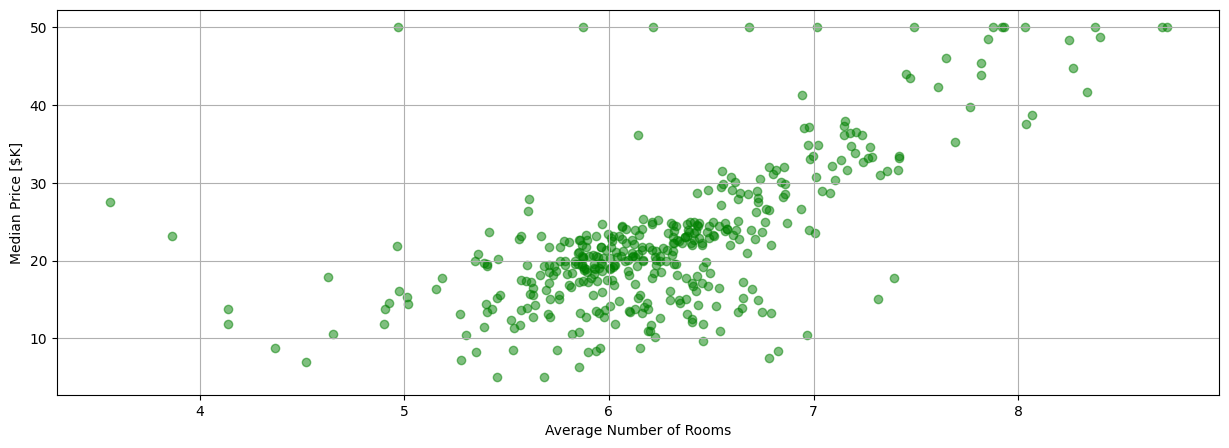

In [5]:
plt.figure(figsize=(15, 5))

plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color='green', alpha=0.5);

## Model Building

In [6]:
model = Sequential()

# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005), loss='mse')

## Model Fitting

In [8]:
history = model.fit(X_train_1d,
                    y_train,
                    batch_size=16,
                    epochs=101,
                    validation_split=0.3)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 915.1423 - val_loss: 1066.7605
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 868.1475 - val_loss: 1025.1777
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 831.2651 - val_loss: 985.7144
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 795.9760 - val_loss: 947.2801
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 761.6248 - val_loss: 909.7231
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 728.1190 - val_loss: 873.0208
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 695.4445 - val_loss: 837.1694
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 663.5988 - val_loss: 802.1684
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 632.5810 - val_loss: 768.0168
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 602.3906 - val_loss: 734.7147
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 573.0273 - val_loss: 702.2615
Epoch 12/101
18/1

## Validation

In [9]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

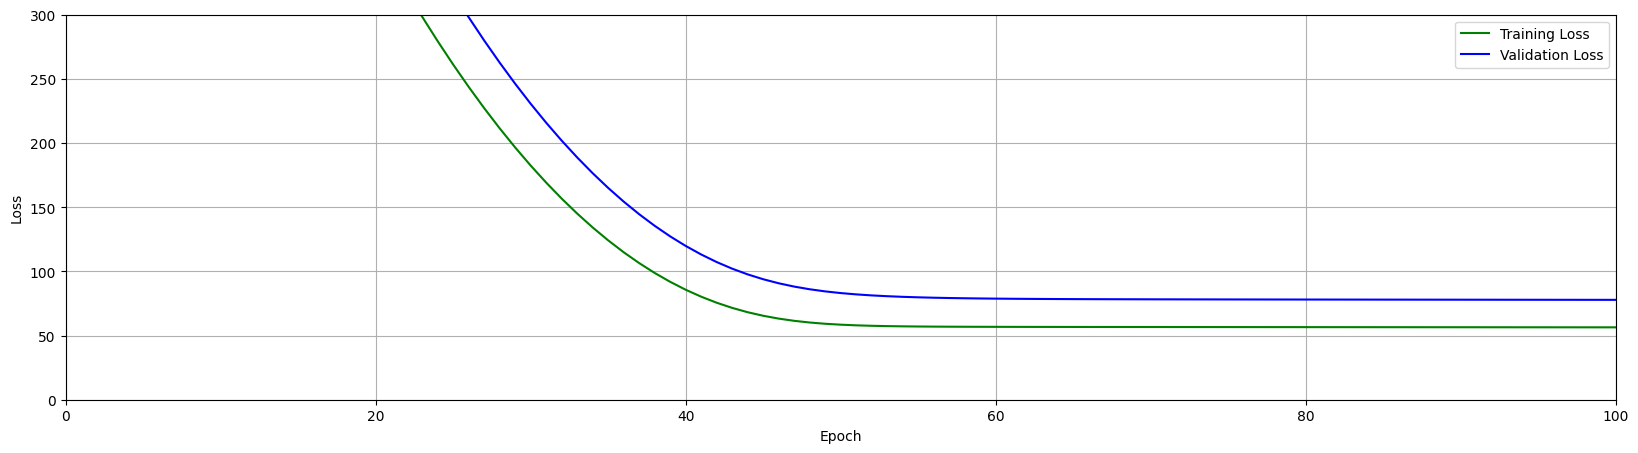

In [10]:
plot_loss(history)

## Prediction

In [11]:
x = np.array([[3], [4], [5], [6], [7]])  # shape: (5, 1)
y_pred = model.predict(x)

for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx][0], int(y_pred[idx]*10)/10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted price of a home with 3 rooms: $12.5K
Predicted price of a home with 4 rooms: $15.5K
Predicted price of a home with 5 rooms: $18.4K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.4K


<ipython-input-11-d7e1192512ac>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price of a home with {} rooms: ${}K".format(x[idx][0], int(y_pred[idx]*10)/10))


In [12]:
# Generate feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


## Conclusion

In [13]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

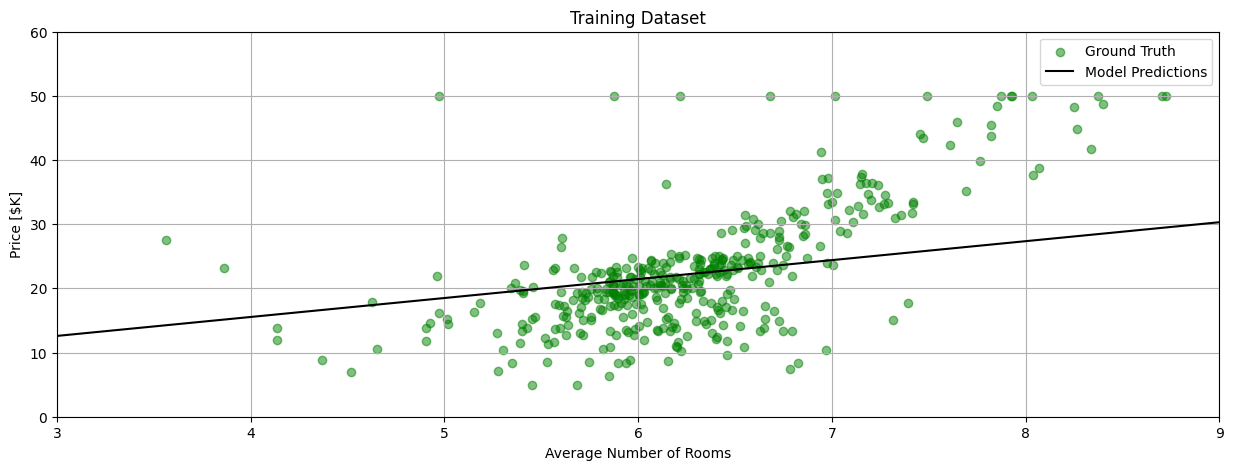

In [14]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

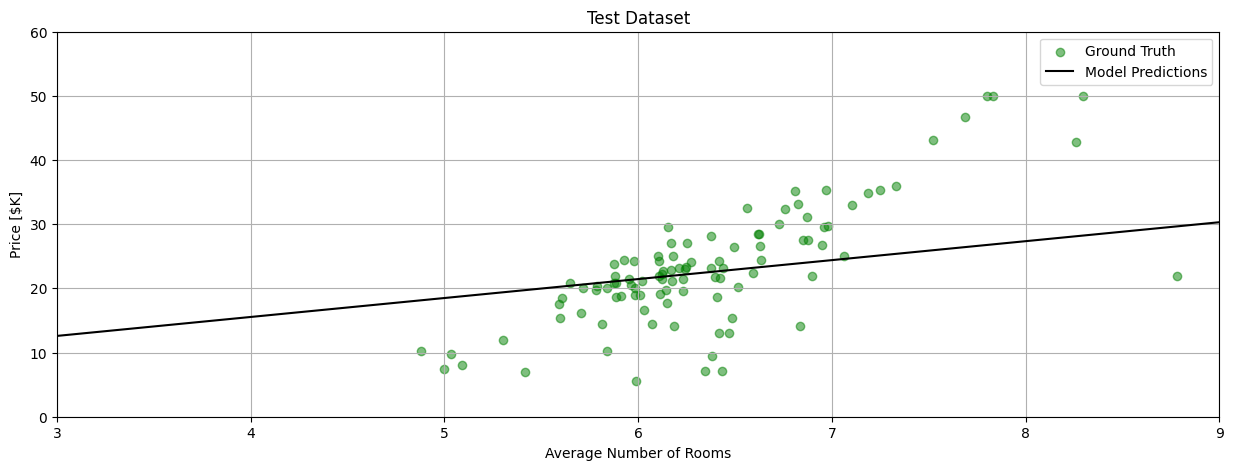

In [15]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')

1. The Basic Linear Regression Neuron

A single neuron in a neural network performs a weighted sum of its inputs and adds a bias term.  This is precisely the calculation done in linear regression.

Mathematically:  output = (w1 * x1) + (w2 * x2) + ... + (wn * xn) + b

x1, x2, ..., xn are the input features.

w1, w2, ..., wn are the weights associated with each input feature.

b is the bias term.

2. Representing Linear Regression with a Neural Network

To implement linear regression with a neural network, you create a network with a single layer containing one neuron.

Crucially, this output neuron has no activation function.  The direct output of the weighted sum and bias is used as the prediction.

3. Why Use a Deep Neural Network for Linear Regression?

At first, it seems counterintuitive to use a deep neural network (a network with multiple layers) for linear regression, which is inherently a simple linear model.  However, there are a few reasons and nuances:

Feature Learning (with extra layers): If you add hidden layers before the final output layer, the initial layers can learn complex, non-linear combinations of the input features.  Even though the final layer performs a linear transformation, the preceding layers can transform the data into a higher-level representation that might improve the linear fit. In the corrected code, the layers:

Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Hidden layer 1
Dense(32, activation='relu'),  # Hidden layer 2

act as feature extractors.

Regularization: Deep neural networks have techniques like dropout and weight decay that can act as regularizers, potentially preventing overfitting, even in a linear regression context.  The relu activation in the hidden layers also contributes to non-linearity and can help with regularization.

Framework Familiarity: Using a neural network framework like TensorFlow/Keras for linear regression can provide familiarity with the framework, which is essential for more complex deep learning tasks.

Generalization: In some cases, especially with high-dimensional data, a deep network with non-linear hidden layers might learn a more robust representation of the data, leading to better generalization than a simple linear model.  This is because the hidden layers can learn feature combinations that a simple linear model cannot.

4. Training the Network

The neural network is trained using an optimization algorithm (like Adam) to minimize a loss function.  For linear regression, the typical loss function is Mean Squared Error (MSE).

The optimizer adjusts the weights and biases of the network to reduce the MSE between the predicted and actual values.

5. Application to Boston Housing Data

In the Boston Housing Price prediction problem, the goal is to predict the median value of owner-occupied homes based on features like crime rate, number of rooms, etc.

By using a deep neural network with a final linear output layer, the model can learn complex relationships between these features and the house prices, potentially leading to more accurate predictions than a simple linear regression model that directly relates the original features to the output.

The hidden layers learn intermediate representations of the data. For example, one hidden neuron might learn a feature that represents "overall neighborhood quality," which is a combination of several input features.

Key Points

The final layer in a neural network performing linear regression has a single neuron and no activation function.

While a single-layer network can do basic linear regression, using a deep network with non-linear activation functions in the hidden layers allows the network to learn complex feature representations, potentially improving the linear fit in the output layer.